<a href="https://colab.research.google.com/github/anuj123-45/CustomerSegmentation/blob/master/CustomerSegmenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# loading data
df=pd.read_excel('/content/drive/MyDrive/ecom customer_data.xlsx')
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [4]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


**Data Cleaning**

In [5]:
#Check the duplicates
df[df.duplicated()]


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft


In [6]:
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [7]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [8]:
df.isna().sum().sum()

0

**Data Visualization**

In [9]:
df.Gender.value_counts()

Gender
F    24778
M     5222
Name: count, dtype: int64

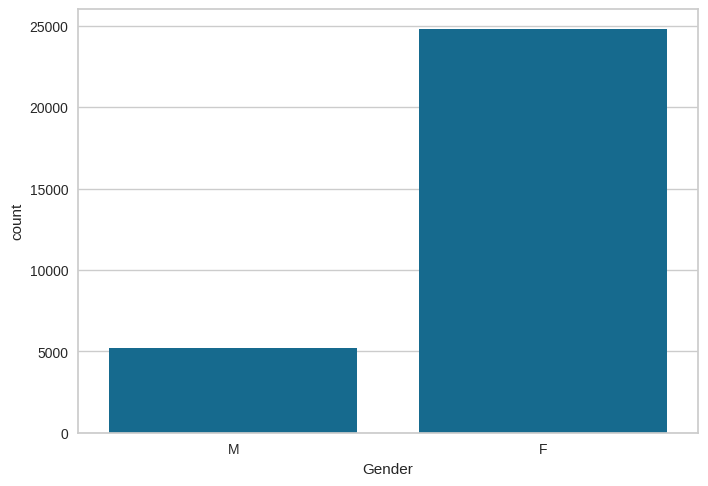

In [10]:
sns.countplot(data=df,x='Gender')
plt.show()


<Axes: xlabel='Orders', ylabel='count'>

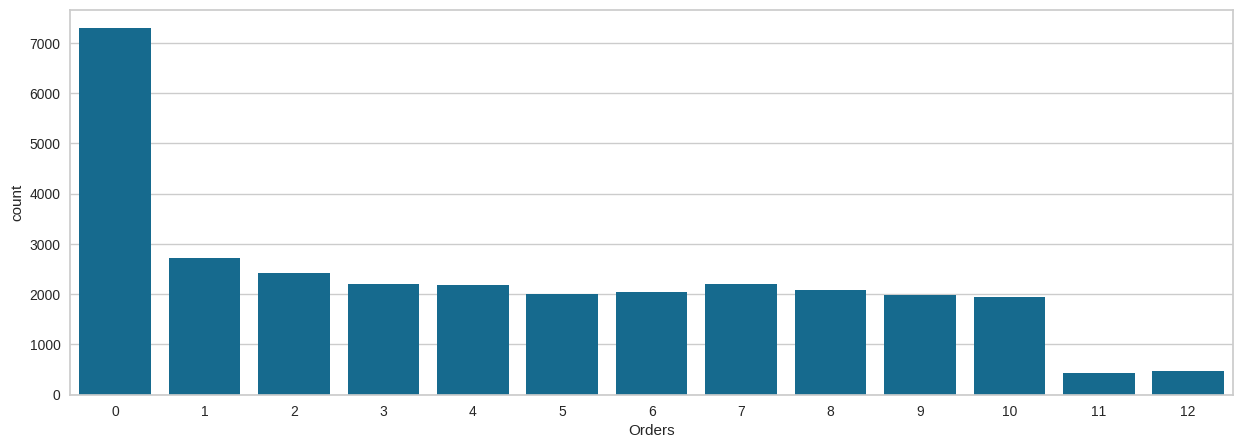

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Orders')

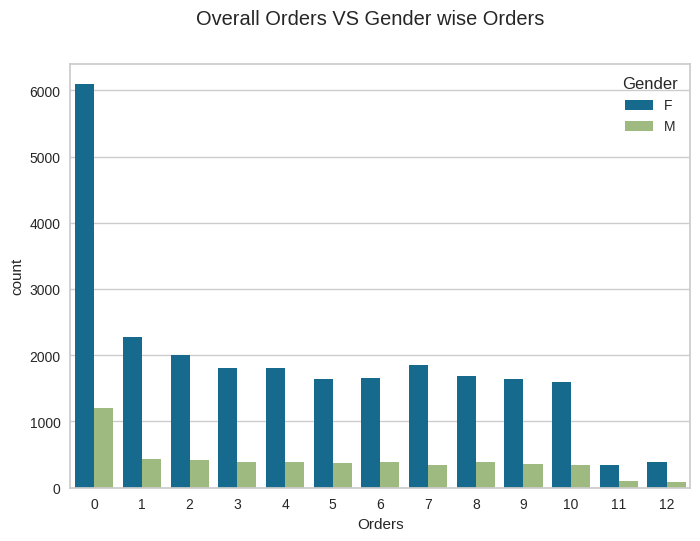

In [12]:
#Order count by each number
sns.countplot(data=df,x='Orders',hue='Gender')
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()


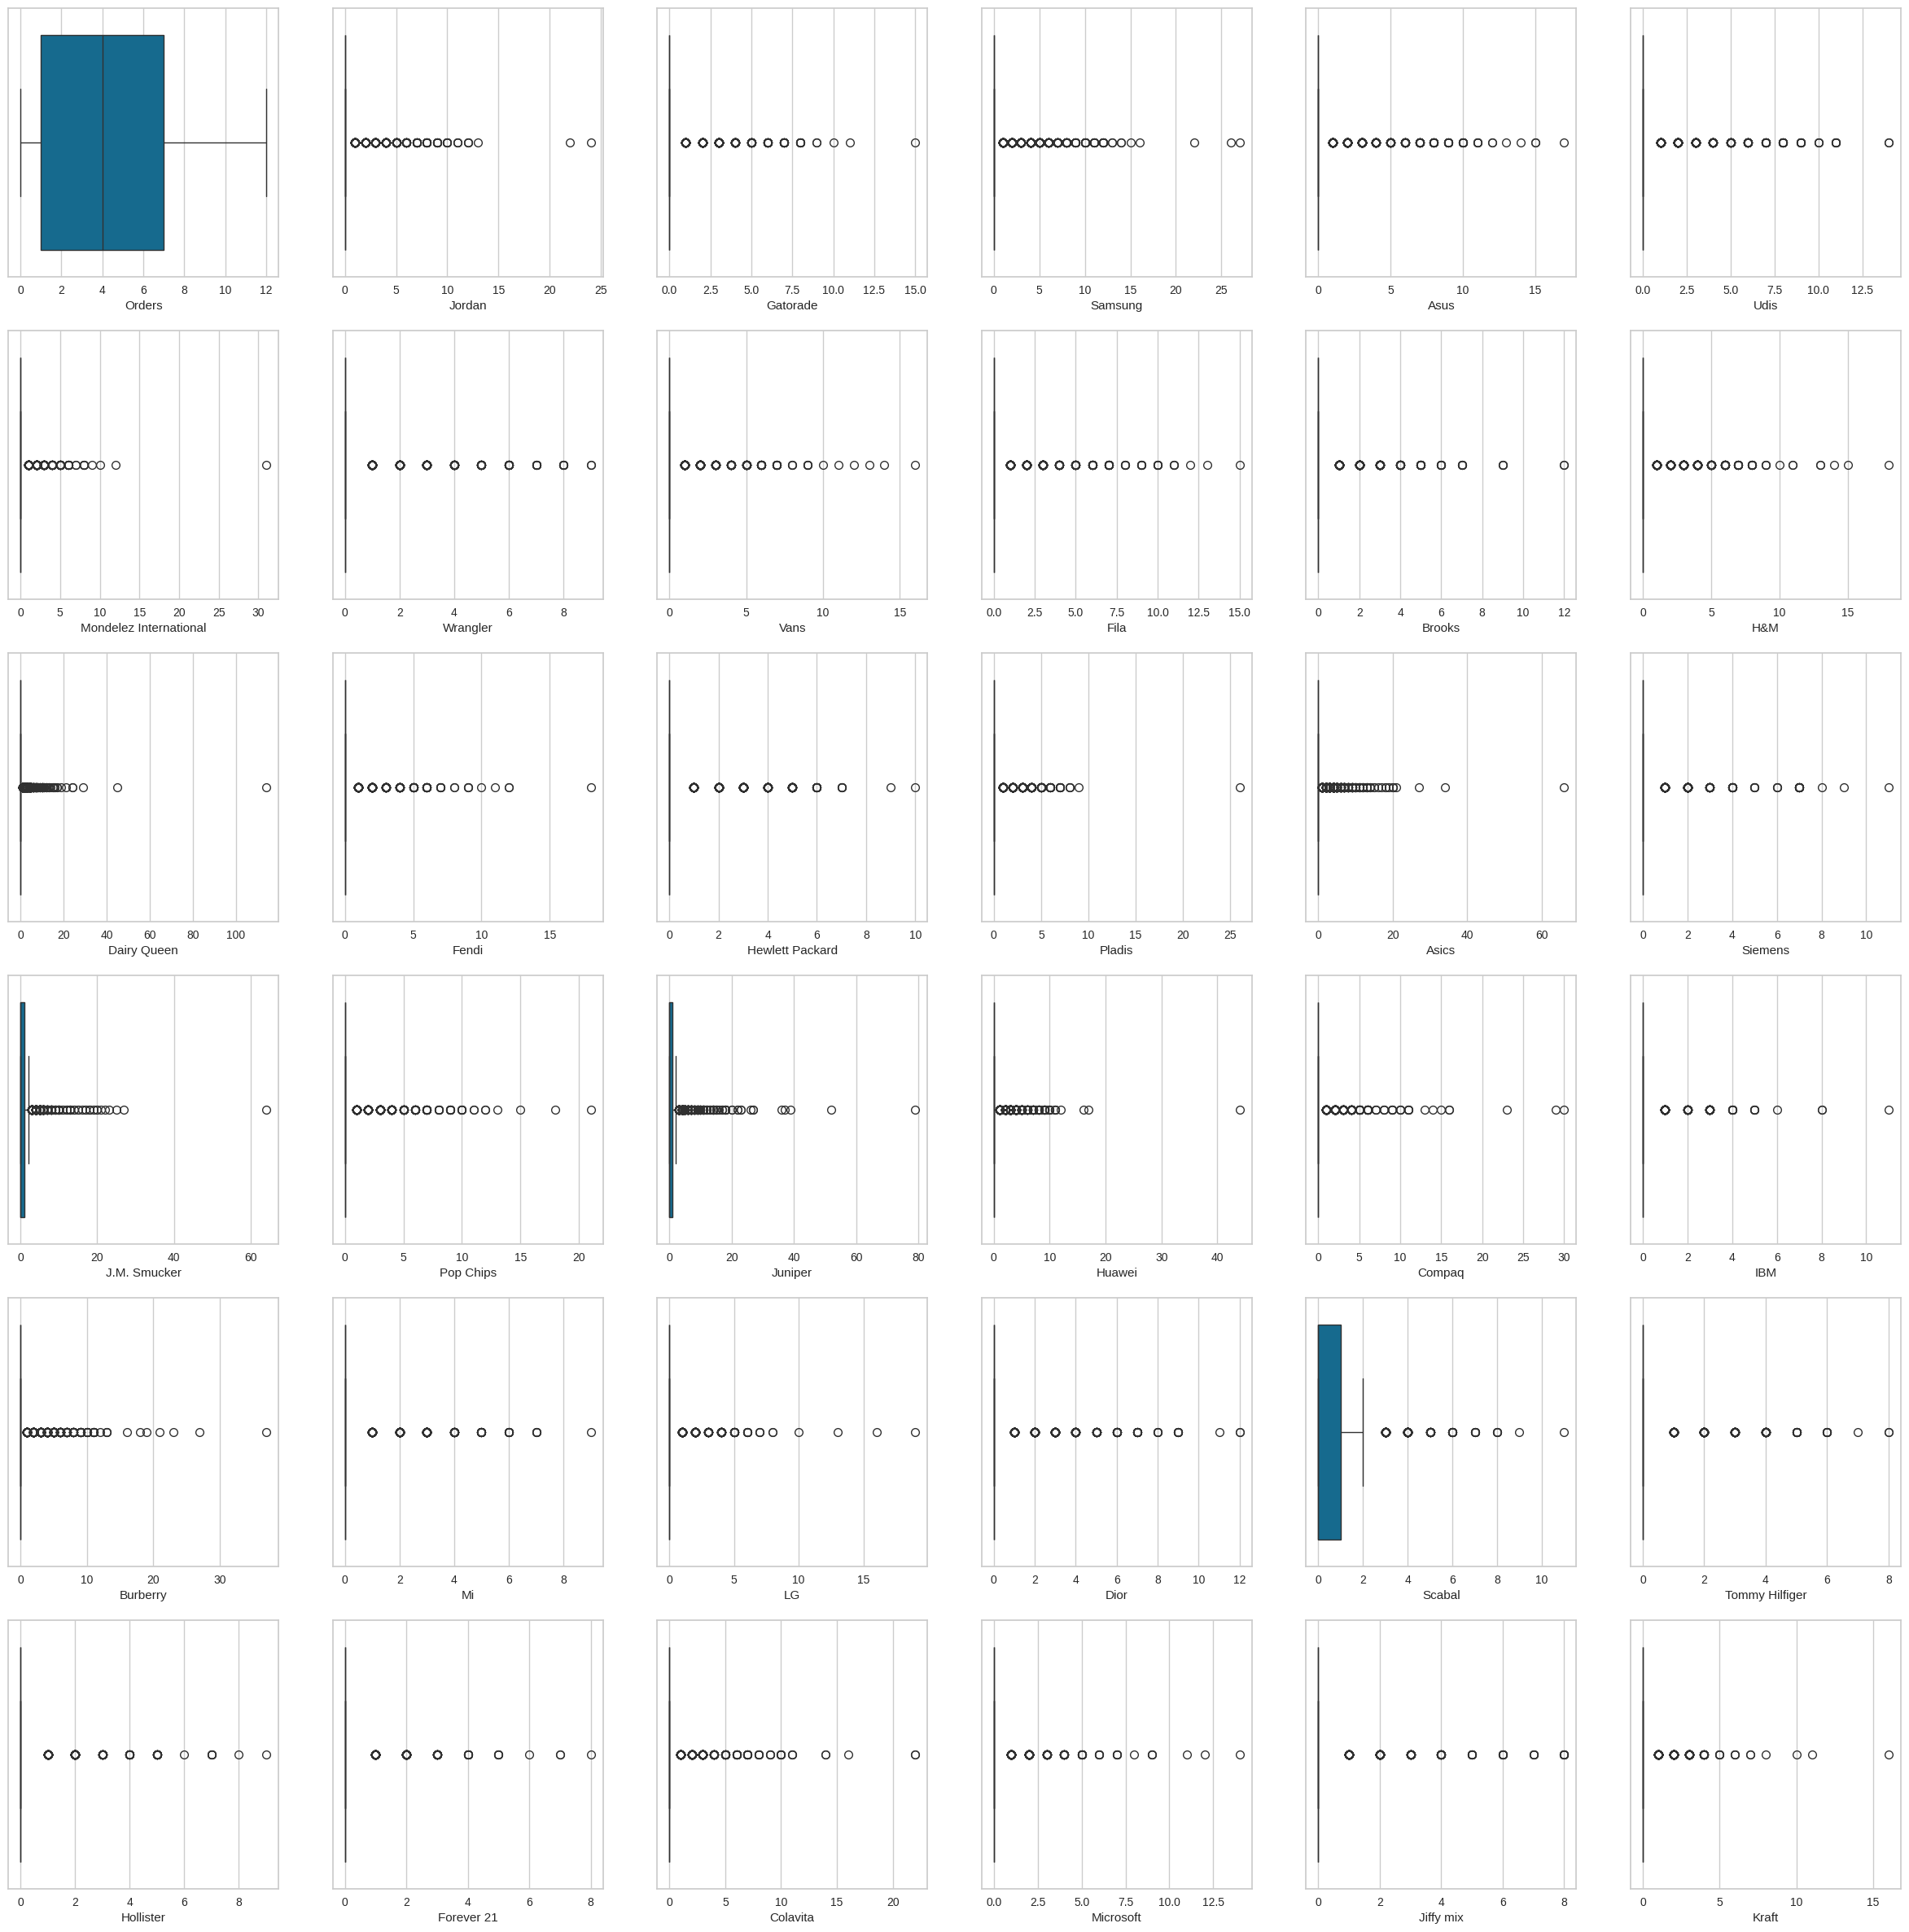

In [13]:
#Orders and searches of each brands
cols=list(df.columns[2:])
def dist_list(lst):
  plt.figure(figsize=(30,30))
  for i, col in enumerate(lst,1):
    plt.subplot(6,6,i)
    sns.boxplot(data=df,x=df[col])
dist_list(cols)

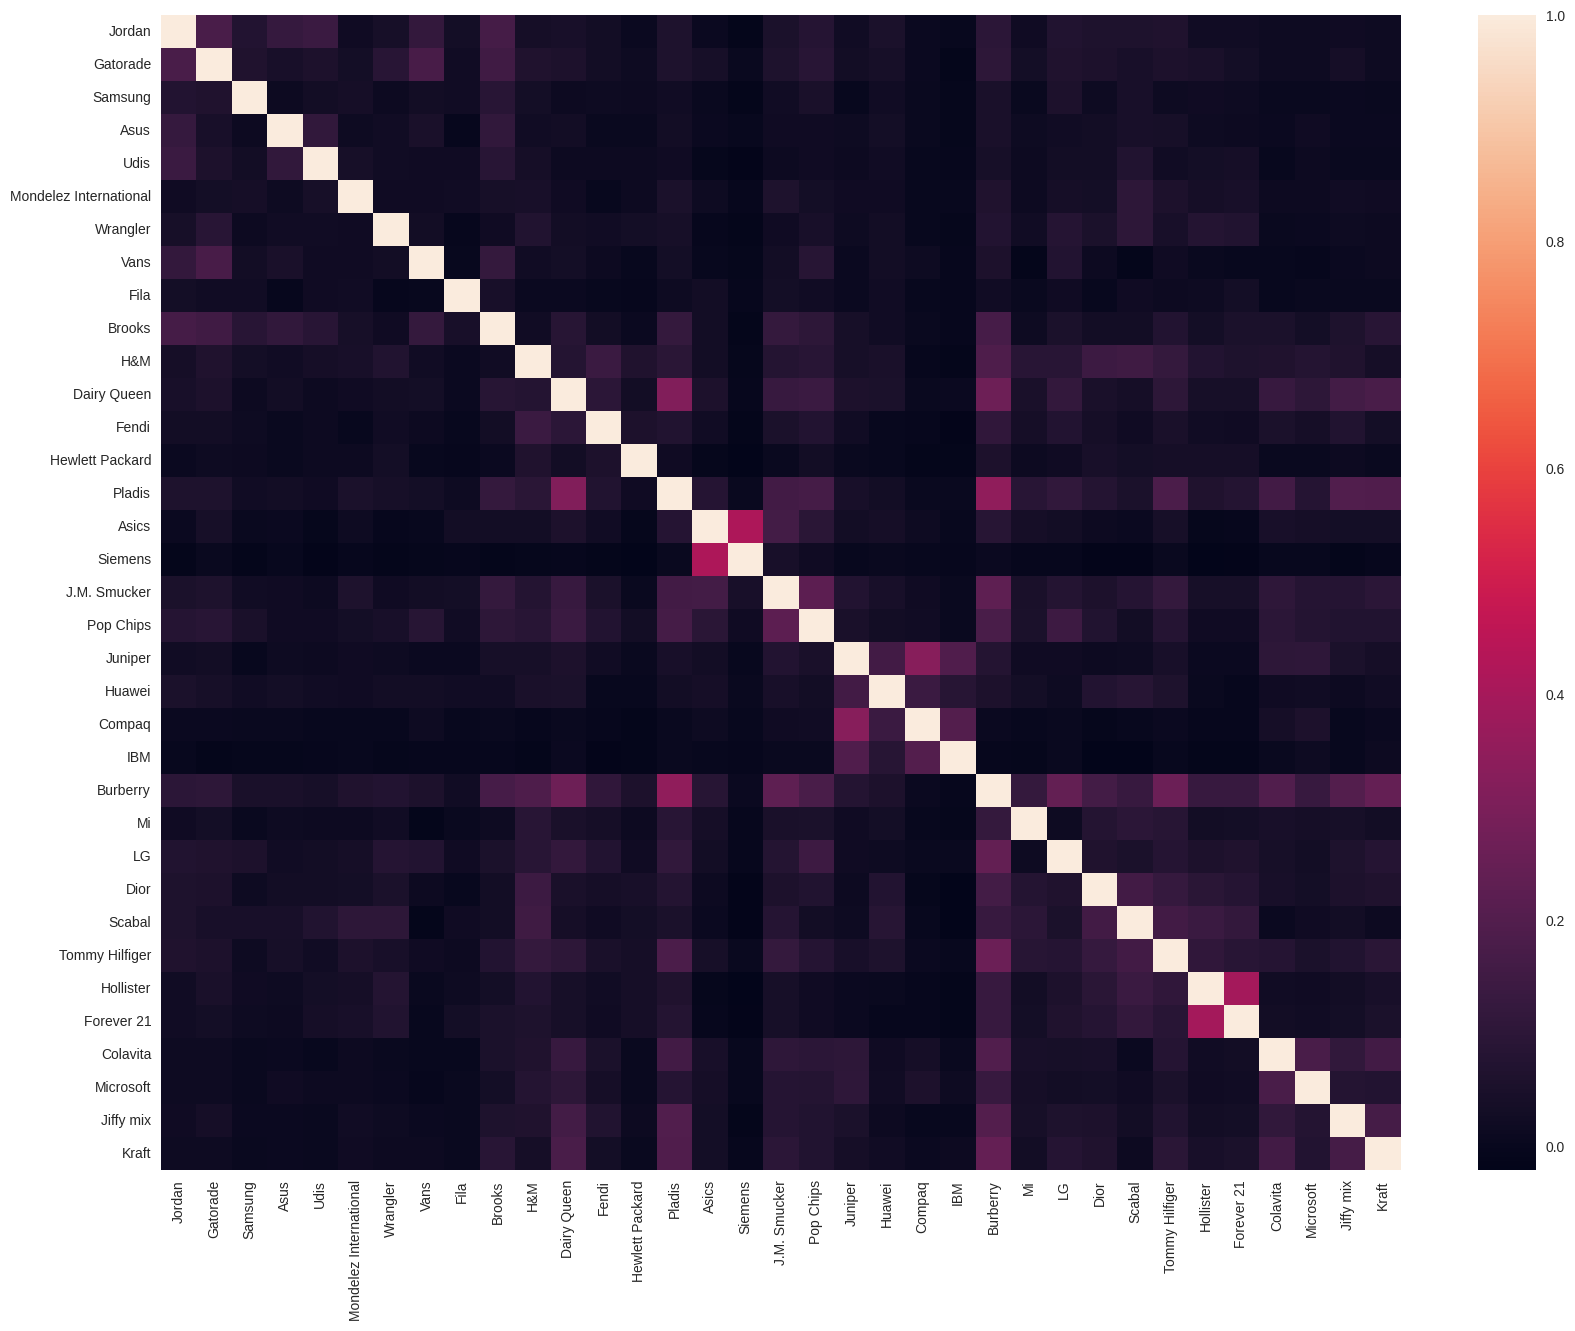

In [14]:
#Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,3:].corr())
plt.show()

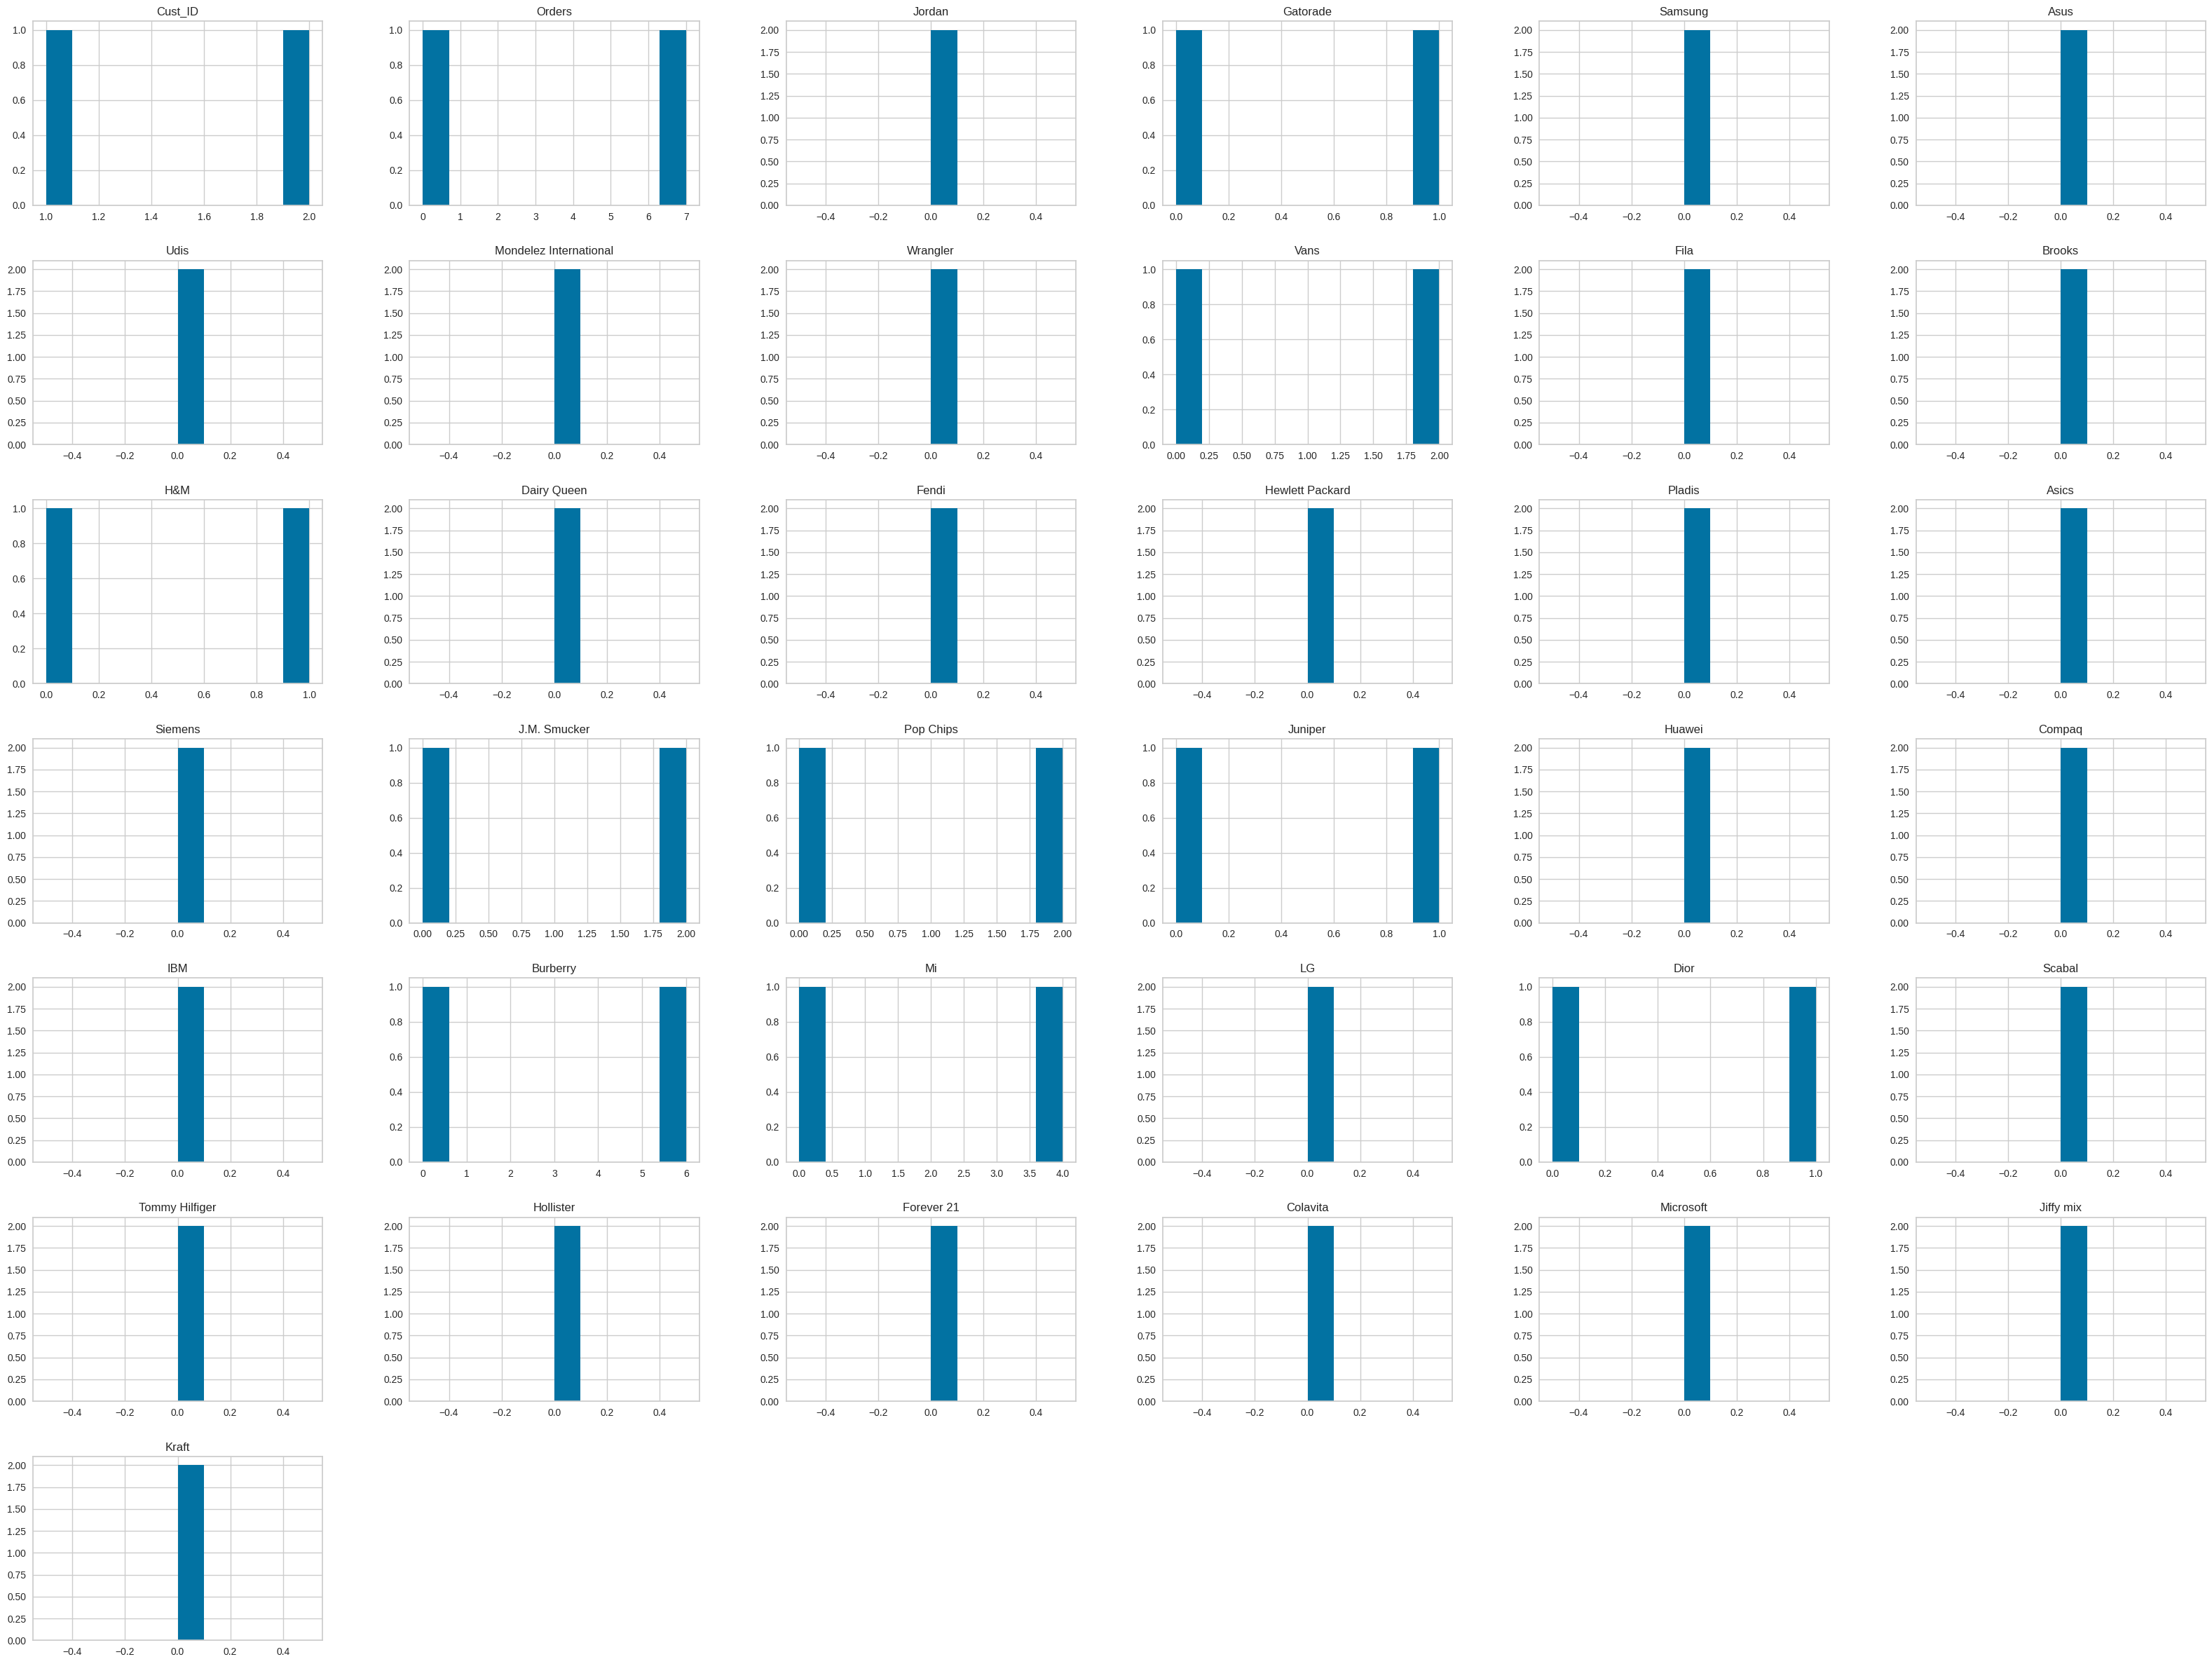

In [15]:
df.iloc[:2,:].hist(figsize=(40,30))
plt.show()

In [16]:
new_df=df.copy()
new_df['Total Search']=new_df.iloc[:,3:].sum(axis=1)

In [17]:
new_df.sort_values('Total Search', ascending=False)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,160
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,136
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,127
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,15001,F,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7247,7248,F,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7255,7256,M,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7259,7260,F,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


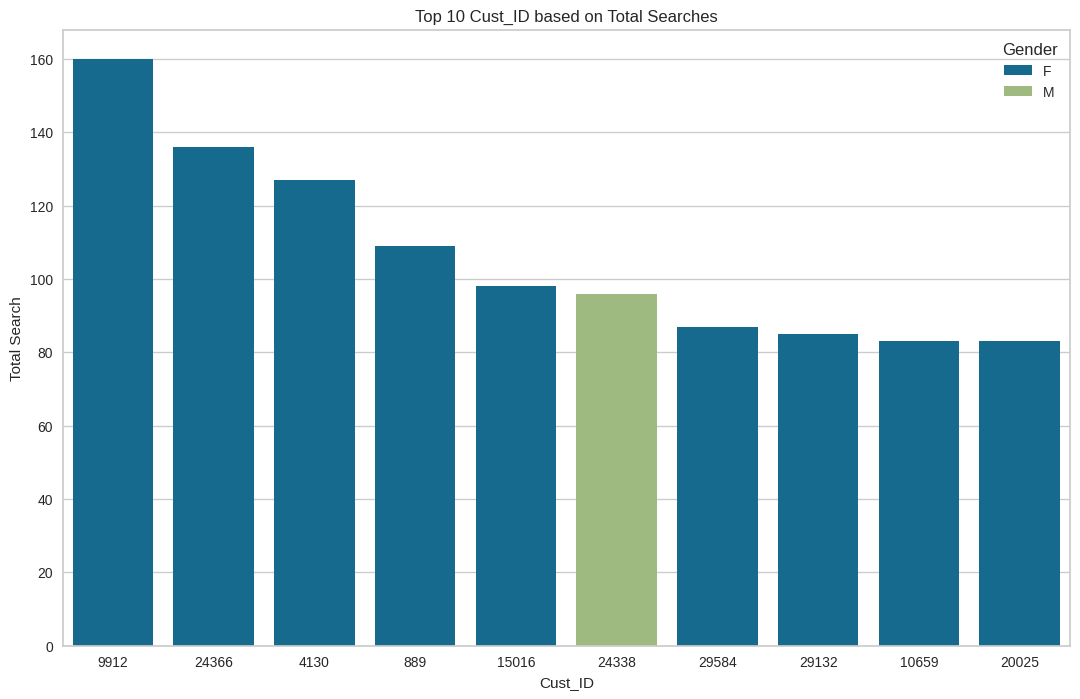

In [18]:
plt.figure(figsize=(13,8))
plt_data=new_df.sort_values('Total Search',ascending=False)[['Cust_ID','Gender','Total Search']].head(10)
sns.barplot(data=plt_data,
            x='Cust_ID',
            y='Total Search',
            hue='Gender',
            order=plt_data.sort_values('Total Search',ascending=False).Cust_ID)
plt.title("Top 10 Cust_ID based on Total Searches")
plt.show()

In [19]:
#Scaling
x=df.iloc[:,2:].values
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]])

In [20]:
scale=MinMaxScaler()
features=scale.fit_transform(x)
features


array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Elbow method to get the optimal K value**

In [21]:
inertia=[]
for i in range(1,16):
  k_means=KMeans(n_clusters=i)
  k_means=k_means.fit(features)
  inertia.append(k_means.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

(Text(0.5, 0, 'No of clusters'), Text(0, 0.5, 'Inertia'))

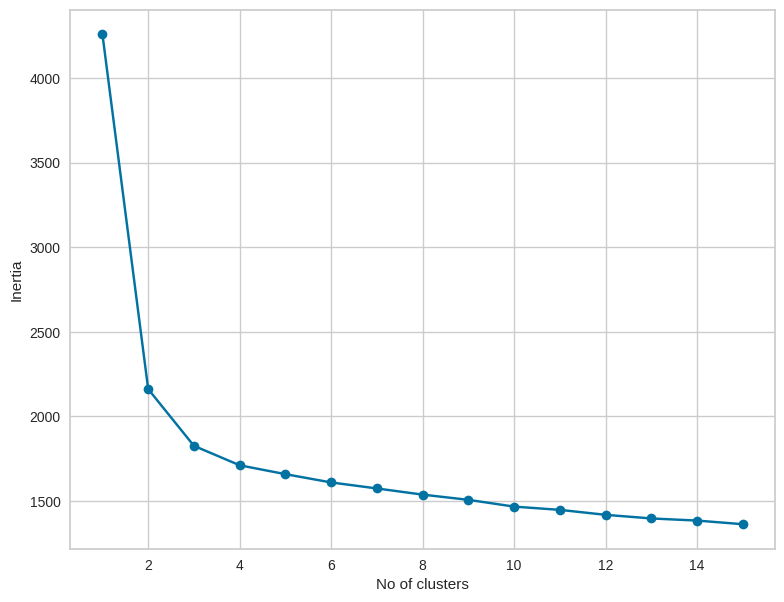

In [22]:
#Elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16),inertia, 'bo-')
plt.xlabel('No of clusters'),plt.ylabel('Inertia')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

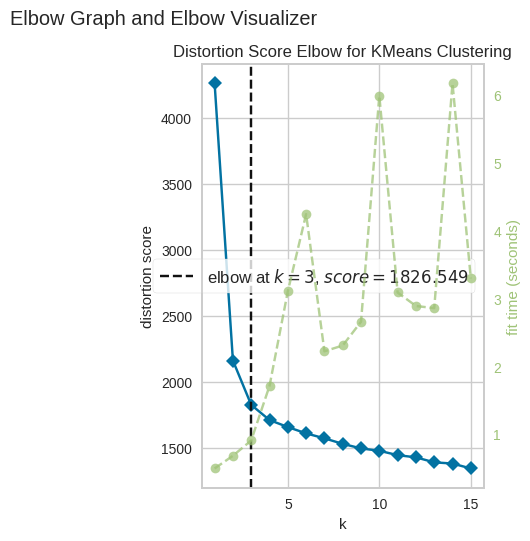

In [23]:
#Kelbow visualizer
plt.subplot(1,2,2)
kmeans=KMeans()
visualize=KElbowVisualizer(kmeans,k=(1,10))
visualize.fit(features)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()


**Silhouette Score for each k value**

In [24]:
silhouette_avg=[]
for i in range(2,10):
  #initialize kmeans cluster
  kmeans=KMeans(n_clusters=i)
  cluster_labels=kmeans.fit_predict(features)
  #Silhouette score
  silhouette_avg.append(silhouette_score(features,cluster_labels))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

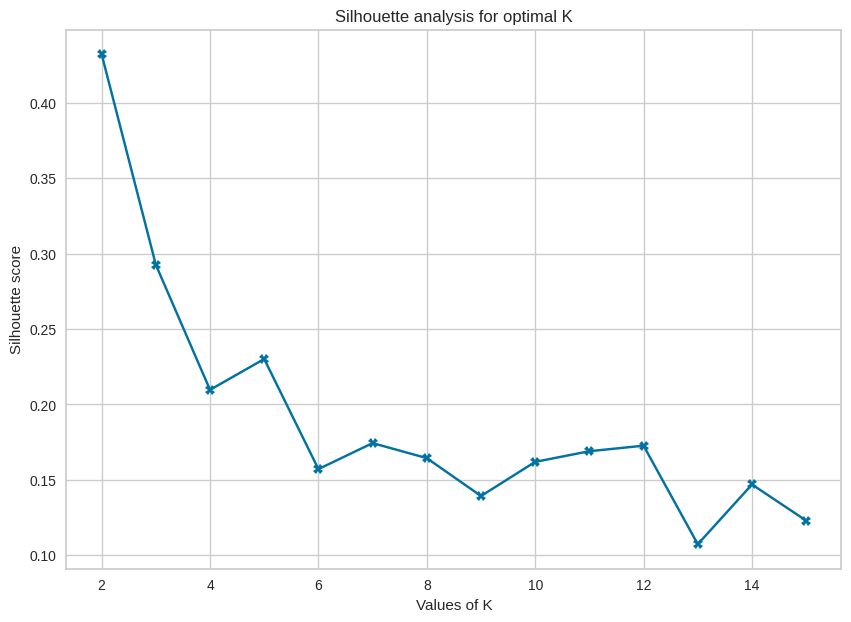

In [25]:
plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg, 'bX-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for optimal K')
plt.show()

**Kmeans Model Here we will take K value as 3 as per Elbow Method**

In [113]:
model=KMeans(n_clusters=3)
model=model.fit(features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [114]:
y_km=model.predict(features)
centers=model.cluster_centers_


In [115]:
df['Cluster']=pd.DataFrame(y_km)
df.to_csv("Cluster_data", index=False)

In [116]:
df["Cluster"].value_counts()

Cluster
0    12432
2     9128
1     8440
Name: count, dtype: int64

<Axes: xlabel='Cluster', ylabel='count'>

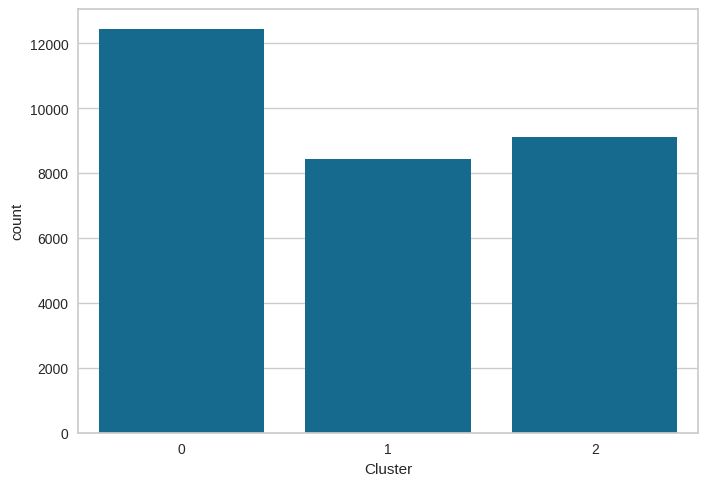

In [117]:
#countplot
sns.countplot(data=df,x='Cluster')


**Analyze the cluster**

In [118]:
c_df=pd.read_csv('Cluster_data')
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2


In [119]:
c_df['Total Search']=c_df.iloc[:,3:38].sum(axis=1)

In [120]:
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster,Total Search
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
1,2,F,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,5
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,F,10,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,2,16


**Analyze the cluster 0**

In [121]:
cl_0=c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster==0')
cl_0

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,154699357,6269,2470,1947,2086,1813,1632,1480,...,3041,4194,1807,847,654,1960,1153,870,776,70690
1,0,M,28245384,1291,601,777,435,12,75,162,...,283,175,172,83,55,386,186,160,142,10787


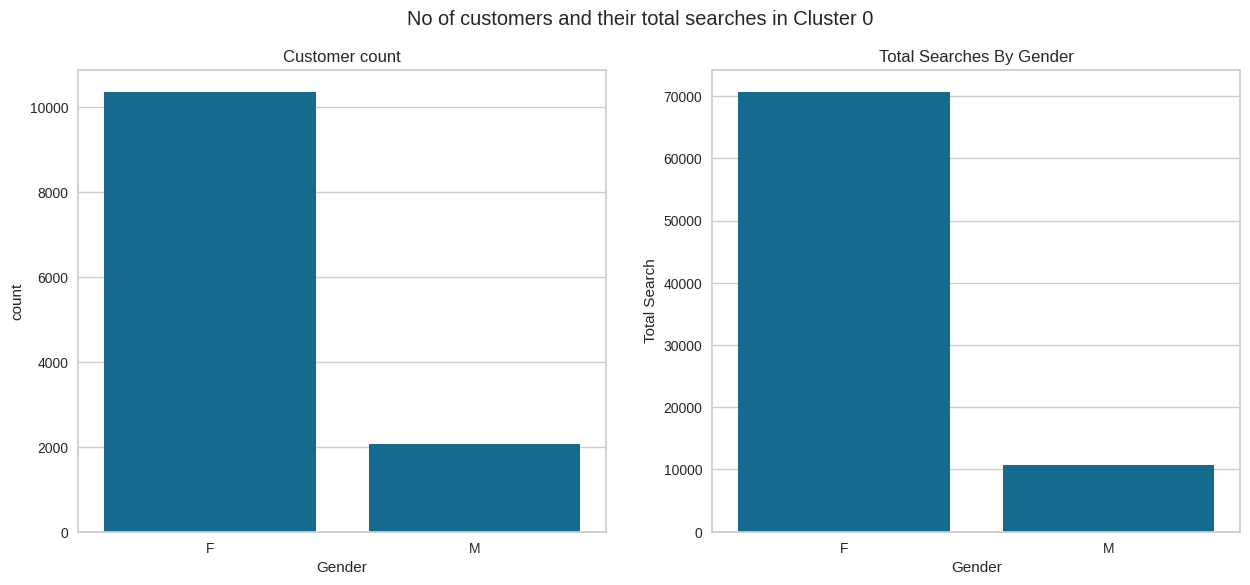

In [122]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==0'),x='Gender')
plt.title('Customer count')
plt.subplot(1,2,2)
sns.barplot(data=cl_0,x='Gender',y='Total Search')
plt.title('Total Searches By Gender')
plt.suptitle('No of customers and their total searches in Cluster 0')
plt.show()

**Analyze Cluster 1**

In [123]:
cl_1=c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster==1')
cl_1

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
2,1,F,106470376,30755,1923,1603,1725,1414,1185,1108,...,2039,3092,1196,649,463,1335,865,665,491,51550
3,1,M,21374453,6894,521,748,321,22,55,147,...,246,104,117,56,41,294,193,110,110,8543


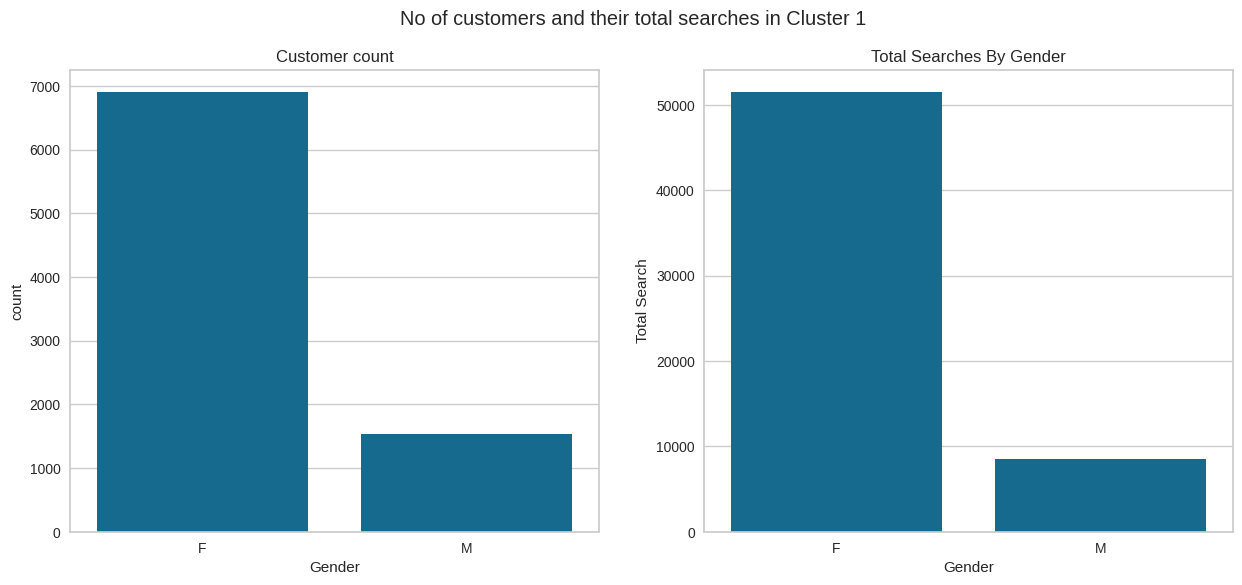

In [124]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==1'),x='Gender')
plt.title('Customer count')
plt.subplot(1,2,2)
sns.barplot(data=cl_1,x='Gender',y='Total Search')
plt.title('Total Searches By Gender')
plt.suptitle('No of customers and their total searches in Cluster 1')
plt.show()

**Cluster 2**

In [125]:
cl_2=c_df.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster==2')
cl_2

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
4,2,F,116501910,65606,1982,1678,1780,1565,1308,1145,...,2241,3440,1322,605,465,1465,918,713,510,55251
5,2,M,22723520,14279,526,817,341,14,51,151,...,284,97,155,90,42,326,176,123,98,9322


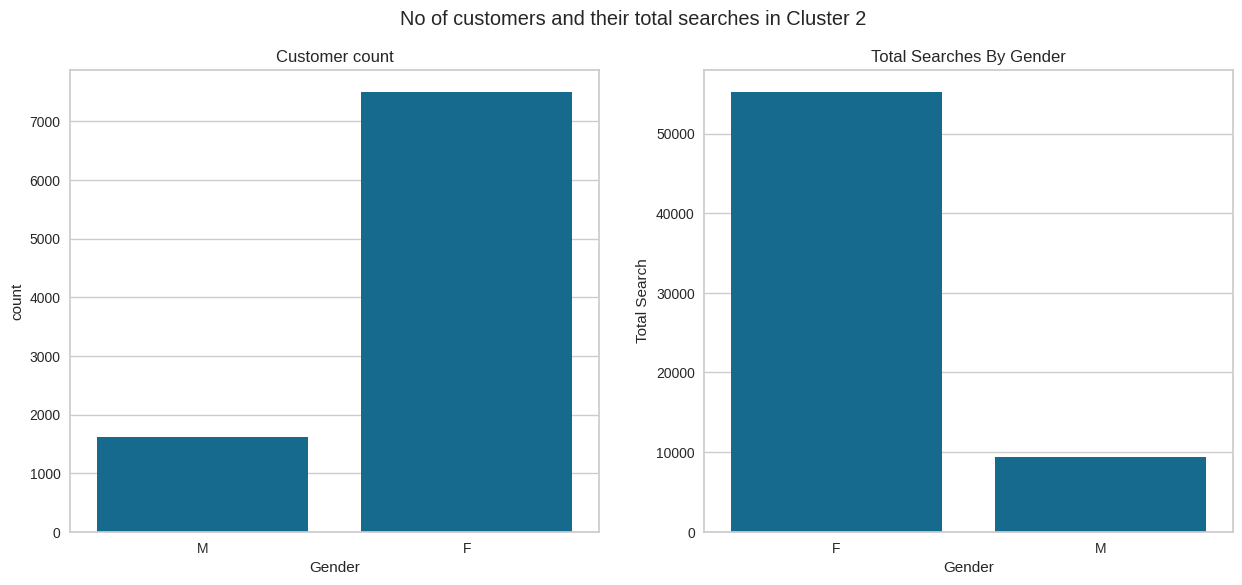

In [126]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==2'),x='Gender')
plt.title('Customer count')
plt.subplot(1,2,2)
sns.barplot(data=cl_2,x='Gender',y='Total Search')
plt.title('Total Searches By Gender')
plt.suptitle('No of customers and their total searches in Cluster 2')
plt.show()

**Overall Analysis**

In [127]:
final_df=c_df.groupby(['Cluster'],as_index=False).sum()
final_df

,Cluster,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,182944741,FFFFFFFFMFFMFFFFFFFFFFFFFFFFFFFFFFMFMMMFFFFFFF...,7560,3071,2724,2521,1825,1707,1642,...,3324,4369,1979,930,709,2346,1339,1030,918,81477
1,1,127844829,FFFFFFFFFFMMFMFMFFFFFFFFFFFFMFFFMFFFFFFFFFMFFF...,37649,2444,2351,2046,1436,1240,1255,...,2285,3196,1313,705,504,1629,1058,775,601,60093
2,2,139225430,MMFMFFFFMFMMFFMFMFMFFFMFMFMMFFFFFFFFFFFFFFFFFF...,79885,2508,2495,2121,1579,1359,1296,...,2525,3537,1477,695,507,1791,1094,836,608,64573


Text(0.5, 1.0, 'Total Customer on each cluster')

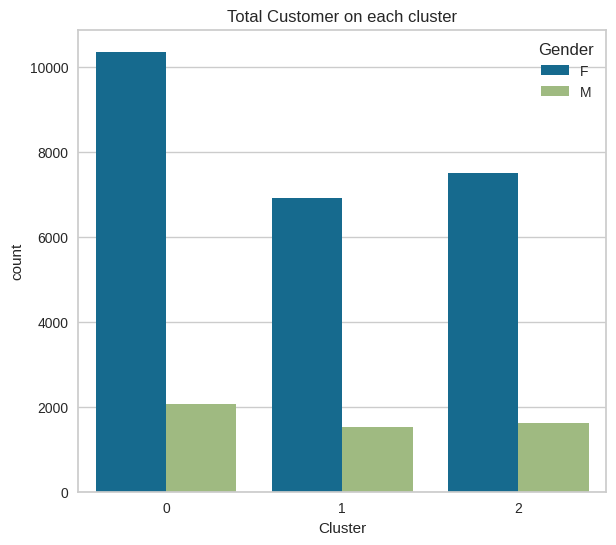

In [128]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df,x='Cluster',hue='Gender')
plt.title('Total Customer on each cluster')

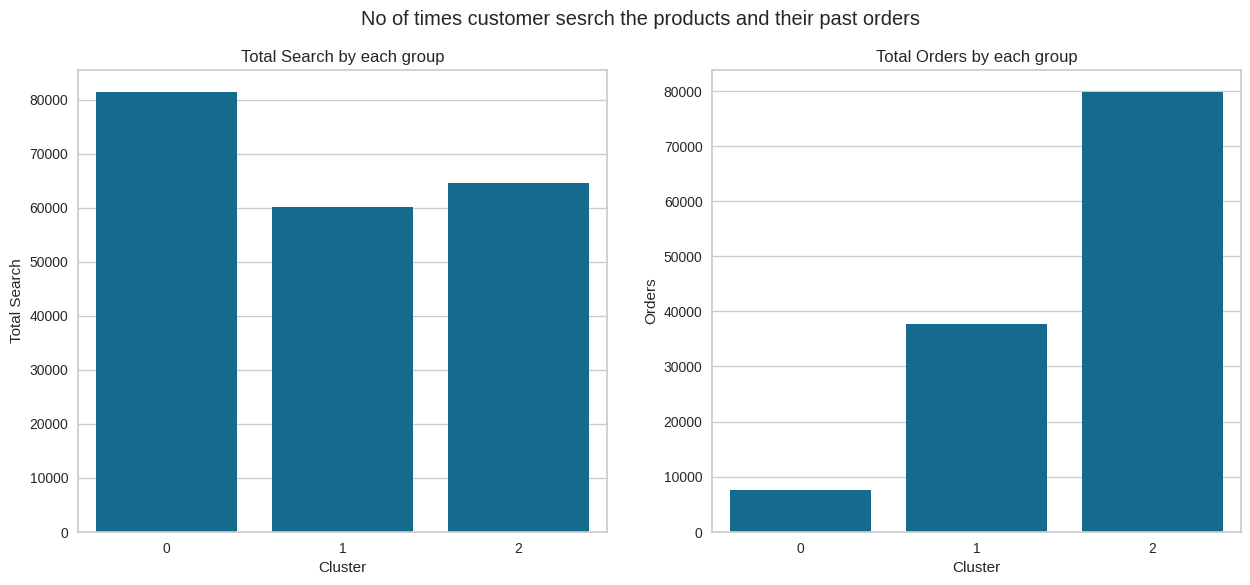

In [129]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=final_df,x='Cluster',y='Total Search')
plt.title('Total Search by each group')
plt.subplot(1,2,2)
sns.barplot(data=final_df,x='Cluster',y='Orders')
plt.title('Total Orders by each group')
plt.suptitle('No of times customer sesrch the products and their past orders')
plt.show()